# 1. Import Libraries


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# 2. Load the Dataset

In [3]:
data=pd.read_csv("customer_support_tickets.csv")

In [4]:
data.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [5]:
data.shape

(8469, 17)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [140]:
data.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [7]:
data.isna().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

# 3. Data Cleaning

### 3.1 Keep only closed tickets

In [8]:
data=data[data['Ticket Status']=='Closed']
data.shape

(2769, 17)

### 3.2 Drop Rows  Without Target Variable

In [9]:
data=data.dropna(subset=['Customer Satisfaction Rating'])

### 3.3 Handel Remaining Minssing Values

In [10]:
data['Resolution'].fillna("Not Provided", inplace=True)

# 4. Feature Engineering

### 4.1 Convert Date Columns

In [11]:
data['First Response Time']=pd.to_datetime(data['First Response Time'])
data['Time to Resolution']=pd.to_datetime(data['Time to Resolution'])

### 4.2 Create Resolution Time(Hours)

In [13]:
data['Resolution_Hours']=(data['Time to Resolution'] - data['First Response Time']).dt.total_seconds()/3600

# 5. Exploratory Data Analysis

### 5.1 Target Distribution

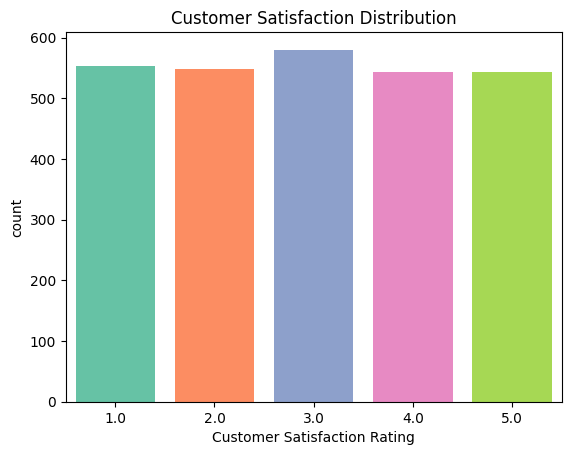

In [148]:
sns.countplot(x='Customer Satisfaction Rating',data=data,palette="Set2",saturation=1)
plt.title("Customer Satisfaction Distribution")
plt.show()

### 5.2 Satisfaction vs Ticket Priority

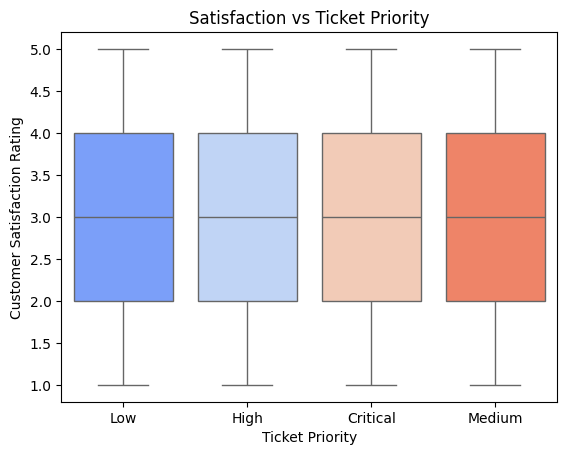

In [149]:
sns.boxplot(x='Ticket Priority',y='Customer Satisfaction Rating',
            data=data,palette='coolwarm',saturation=1)
plt.title("Satisfaction vs Ticket Priority")
plt.show()

### 5.3 Channel Distribution

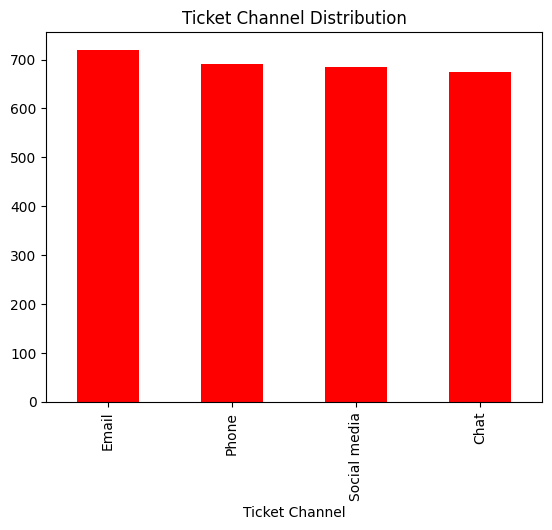

In [150]:
data['Ticket Channel'].value_counts().plot(kind='bar',color='red')
plt.title("Ticket Channel Distribution")
plt.show()


### 5.4 Product Purshased Distributon

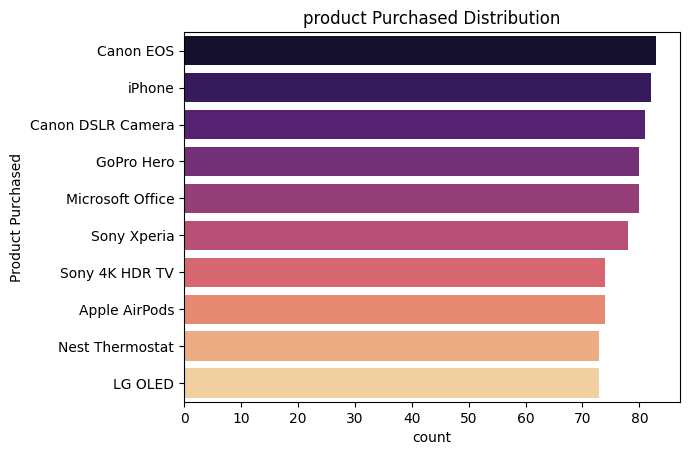

In [151]:
product_purchased_distribution=data['Product Purchased'].value_counts().head(10)
sns.barplot(y=product_purchased_distribution.index,
            x=product_purchased_distribution,palette='magma')
plt.title('product Purchased Distribution')
plt.show()

# 6. Drop Irrelevent Columns

In [152]:
drop_columns = [
    'Ticket ID',
    'Customer Name',
    'Customer Email',
    'Ticket Description',
    'Resolution',
    'First Response Time',
    'Time to Resolution'
]

data.drop(columns=drop_columns, inplace=True)


# 7.Create BINARY TARGET

## Logic:
| Rating | Meaning     | Target |
| ------ | ----------- | ------ |
| 1–2    | Unhappy     | 1      |
| 3–5    | Not Unhappy | 0      |


In [153]:
data['Unhappy_Flag'] = data['Customer Satisfaction Rating'].apply(
    lambda x: 1 if x <= 2 else 0
)


# 8. Encode ordered Feature(Ticket Priority)

#### This is ORDERED, so we use level / ordinal encoding, not one-hot.

In [154]:
Priority_map={
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Critical': 4
}

data["Ticket Priority"]=data['Ticket Priority'].map(Priority_map)

# 9. Define Features & Target

In [155]:
X = data.drop(
    columns=[
        'Customer Satisfaction Rating',
        'Unhappy_Flag',
        'Date of Purchase'
    ]
)

y = data['Unhappy_Flag']


# 10. Train-Test-Split

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# 11. One-Hot Encode Categorical Columns

In [157]:
categorical_cols = [
    'Customer Gender',
    'Product Purchased',
    'Ticket Type',
    'Ticket Subject',
    'Ticket Status',
    'Ticket Channel'
]


preprocessor = ColumnTransformer(
    transformers=[
        ('Categorical',OneHotEncoder(handle_unknown='ignore'),categorical_cols)
    ],
    remainder='passthrough'
)


# 12.Build Classification Model (Random Forest)

In [158]:
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])


# 13. Train the Model

In [159]:
model.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Categorical', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# 14. Predict and Evaluate

In [160]:
y_pred = model.predict(X_test)


#### Accuracy

In [161]:
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.575812274368231


#### Classification Report

In [162]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.61      0.85      0.71       334
           1       0.41      0.15      0.22       220

    accuracy                           0.58       554
   macro avg       0.51      0.50      0.47       554
weighted avg       0.53      0.58      0.52       554



#### Confusion Matrix

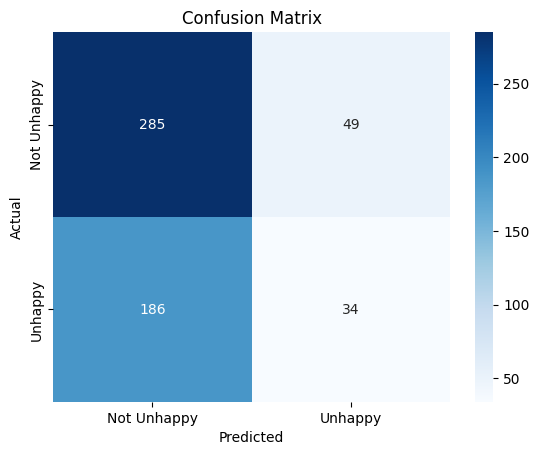

In [164]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Unhappy', 'Unhappy'],
    yticklabels=['Not Unhappy', 'Unhappy']
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Save the model

In [165]:
import joblib
joblib.dump(model, "customer_satisfaction_binary_model.pkl")


['customer_satisfaction_binary_model.pkl']